<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Clipping%20Raster%20In%20R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clip Raster in R
#### https://www.earthdatascience.org/courses/earth-analytics/lidar-raster-data-r/crop-raster-data-in-r/

In [1]:
# load the raster and rgdal libraries
install.packages("raster")
install.packages("rgdal")
install.packages("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘Rcpp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# install.packages('sf')
# install.packages('exactextractr')
# install.packages("DBI")
# install.packages("RSQLite")
# install.packages("RPostgreSQL")

In [2]:
library(ggplot2)
# library(sf)
library(magrittr)
library(data.table)
library(raster)
# library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

Loading required package: sp


Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=88476126b6faf2429b49cc609cc1fa96&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbWxsYkNGMHNPakJpTGZhdWczcm1rbXFVajNSS0JLRi1Rc0VEallWX3dIY040cFhLaE5TMkkzOU9rX2E1X25qdyIsInN0YXRlIjoiODg0NzYxMjZiNmZhZjI0MjliNDljYzYwOWNjMWZhOTYifQ==


In [4]:
dir.create('/content/Lanai')

In [5]:
# extract the data from drive and bring it to local memory
#  Island Path LS 3x, CCAP 1x

# Lanai

# LS 2000 https://drive.google.com/file/d/1ftBKMbYp5TxsdyRtK4bEGmb-JT43s-Aa/view?usp=drive_link
drive_download(file = as_id('1ftBKMbYp5TxsdyRtK4bEGmb-JT43s-Aa'), path =  '/content/Lanai/Lanai_2000.tif', overwrite = FALSE)
# LS 2001 https://drive.google.com/file/d/1EXjKIHySNRVZIplTd2fKjH2wNakWjQxo/view?usp=drive_link
drive_download(file = as_id('1EXjKIHySNRVZIplTd2fKjH2wNakWjQxo'), path =  '/content/Lanai/Lanai_2001.tif', overwrite = FALSE)
# LS 2002 https://drive.google.com/file/d/1n2NrtrDmT6n1Xvl9FP8AVABgY_LACecr/view?usp=drive_link
drive_download(file = as_id('1n2NrtrDmT6n1Xvl9FP8AVABgY_LACecr'), path =  '/content/Lanai/Lanai_2002.tif', overwrite = FALSE)

# CCAP 2005 https://drive.google.com/file/d/1WpOA_We5K5rKB6g9Yi9xJ0xvFeamXme0/view?usp=drive_link
drive_download(file = as_id('1WpOA_We5K5rKB6g9Yi9xJ0xvFeamXme0'), path =  '/content/Lanai/Lanai_CCAP.tif', overwrite = FALSE)

File downloaded:

• Lanai_2000_elevation.tif <id: 1ftBKMbYp5TxsdyRtK4bEGmb-JT43s-Aa>

Saved locally as:

• /content/Lanai/Lanai_2000.tif

File downloaded:

• Lanai_2001_elevation.tif <id: 1EXjKIHySNRVZIplTd2fKjH2wNakWjQxo>

Saved locally as:

• /content/Lanai/Lanai_2001.tif

File downloaded:

• Lanai_2002_elevation.tif <id: 1n2NrtrDmT6n1Xvl9FP8AVABgY_LACecr>

Saved locally as:

• /content/Lanai/Lanai_2002.tif

File downloaded:

• hi_lanai_2005_ccap_hr_land_cover_20141204.img
  <id: 1WpOA_We5K5rKB6g9Yi9xJ0xvFeamXme0>

Saved locally as:

• /content/Lanai/Lanai_CCAP.tif



In [6]:
ccap_raster <- stack('/content/Lanai/Lanai_CCAP.tif')
ls_2000 <- stack('/content/Lanai/Lanai_2000.tif')
ls_2001 <- stack('/content/Lanai/Lanai_2001.tif')
ls_2002 <- stack('/content/Lanai/Lanai_2002.tif')
ls_stack <- c(ls_2000, ls_2001, ls_2002)

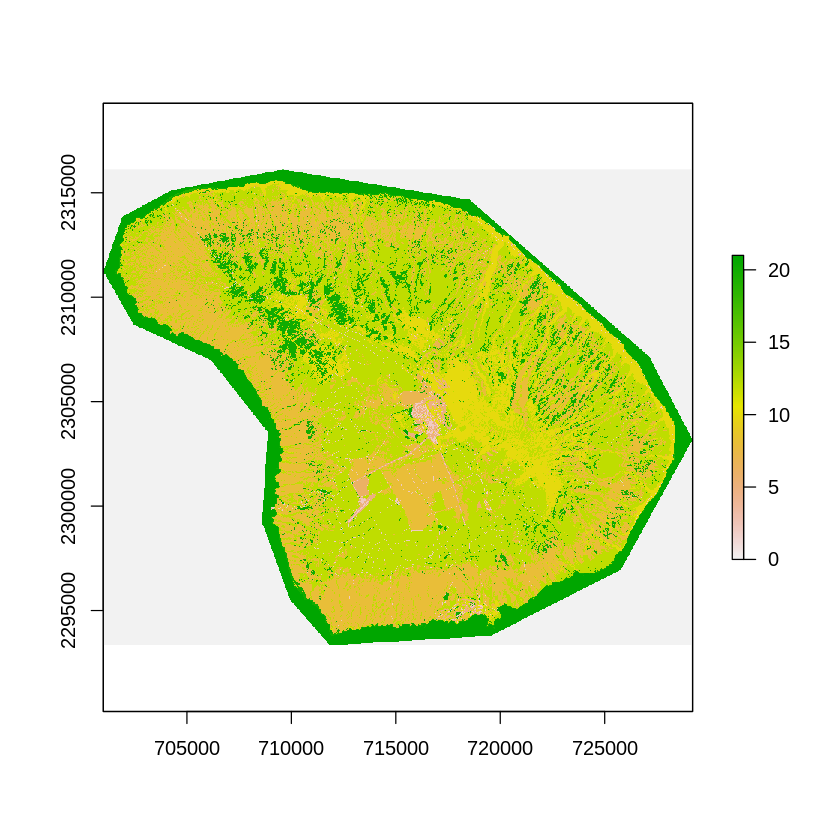

In [7]:
ccap_raster%>% plot

In [8]:
# Stack all three layers into one
stack_all <- stack(ls_2000, ls_2001, ls_2002)

# Define the output file path
output_path <- '/content/Lanai/Lanai_2000_2002.tif'

# Write the stacked raster to a new .tif file
writeRaster(stack_all, filename = output_path, format = 'GTiff')

# Check the new file
stack_all

class      : RasterStack 
dimensions : 1112, 1363, 1515656, 21  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -157.1164, -156.7491, 20.68128, 20.98096  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue.1, Green.1, Red.1, NIR.1, SWIR1.1, SWIR2.1, elevation.1, Blue.2, Green.2, Red.2, NIR.2, SWIR1.2, SWIR2.2, elevation.2, Blue.3, ... 


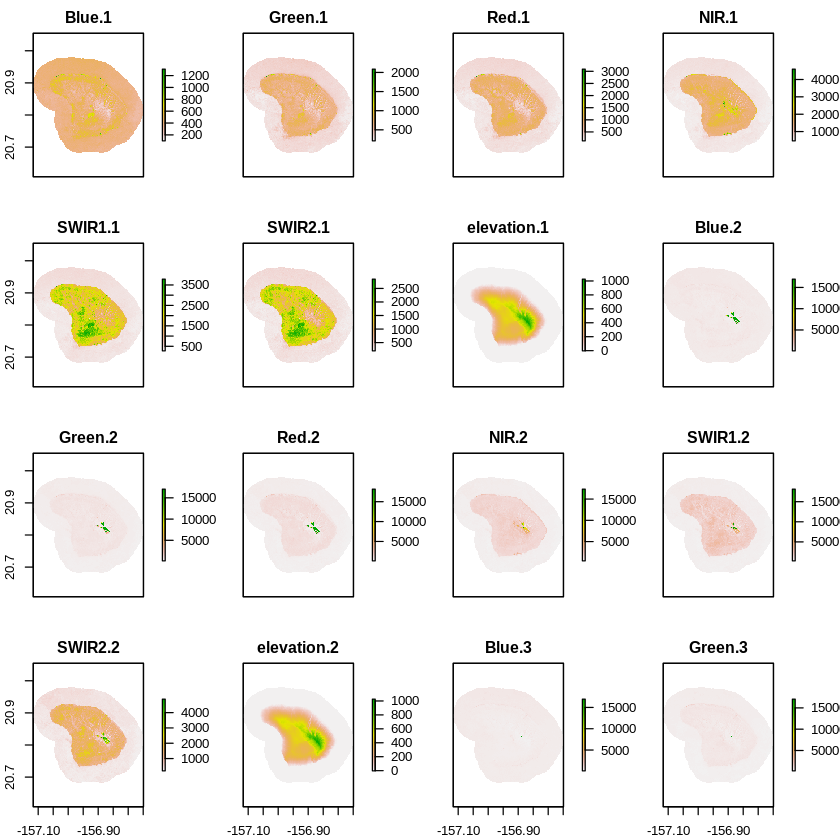

In [9]:
stack_all%>% plot

In [10]:
nrow(ccap_raster)
ncol(ccap_raster)
nlayers(ccap_raster)
dim(ccap_raster)

[1] 9497

[1] 11754

[1] 1

[1]  9497 11754     1

In [11]:
nrow(stack_all)
ncol(stack_all)
nlayers(stack_all)
dim(stack_all)

[1] 1112

[1] 1363

[1] 21

[1] 1112 1363   21

In [12]:
ls_raster_extended <- extend(stack_all, projectExtent(ccap_raster, stack_all), value=NA)

In [13]:
ls_raster_extended

class      : RasterStack 
dimensions : 1112, 1363, 1515656, 21  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -157.1164, -156.7491, 20.68128, 20.98096  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue.1, Green.1, Red.1, NIR.1, SWIR1.1, SWIR2.1, elevation.1, Blue.2, Green.2, Red.2, NIR.2, SWIR1.2, SWIR2.2, elevation.2, Blue.3, ... 


In [14]:
y_end <- c(seq(1,ccap_raster %>% nrow,2048),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,2048),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 2048
extract_grid$y_org <- extract_grid$y_end - 2048

extract_grid$id <- 1:nrow(extract_grid)

In [16]:
y_end
x_end

[1] 2049 4097 6145 8193 9497

[1]  2049  4097  6145  8193 10241 11754

In [18]:
dir.create('/content/Lanai_Export')

In [19]:
new_folder_path <- "/content/Lanai_Export/Lanai_Images"
new_folder_path2 <- "/content/Lanai_Export/Lanai_Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/Lanai_Export/Lanai_Images 
Folder created: /content/Lanai_Export/Lanai_Labels 


In [ ]:
extract_grid

In [22]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=2048 | ncol != 2048){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(ls_raster_extended, projectExtent(ccap_cropped_raster,stack_all))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==2048 & ls_resampled_raster %>% ncol ==2048 & ccap_cropped_raster%>% nrow ==2048 & ccap_cropped_raster%>% ncol ==2048){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/Lanai_Export/Lanai_Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/Lanai_Export/Lanai_Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/Lanai_Export/Lanai_2000_2002.csv")

class      : RasterBrick 
dimensions : 2048, 2048, 4194304, 21  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 701000, 705915.2, 2311204, 2316119  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : r_tmp_2023-11-02_200557.53059_540_08159.grd 
names      :      Blue.1,     Green.1,       Red.1,       NIR.1,     SWIR1.1,     SWIR2.1, elevation.1,      Blue.2,     Green.2,       Red.2,       NIR.2,     SWIR1.2,     SWIR2.2, elevation.2,      Blue.3, ... 
min values : 334.4426986, 262.5574501, 174.0077533, 508.0714167, 329.2077521, 224.7731767,  -0.8401569, 356.9721099, 331.0083711, 242.4824909, 557.7309908, 376.7988412, 265.2508835,  -0.8401569, 289.6706790, ... 
max values :   1267.2544,   2102.8800,   3161.5338,   3619.5318,   3699.5841,   2435.6937,    317.9151,   1310.7906,   2204.7234,   3245.8139,   3654.2275,   3760.7096,   2481.0704,    317.9151,   1245.6616, ... 

class      : RasterBrick 
dimensions : 204

In [23]:
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/Lanai_2000_2002.csv")

In [24]:
zip(zipfile = '/content/Lanai_Export/Lanai_Images_2000_2002.zip', files = c("/content/Lanai_Export"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [30]:
install.packages("googleAuthR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’




In [39]:
# Load the googleCloudStorageR library
install.packages("googleCloudStorageR")
library(googleCloudStorageR)
library(gargle)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gargle’


The following object is masked from ‘package:googledrive’:

    request_make




In [ ]:
scope <-c("https://www.googleapis.com/auth/cloud-platform")
token <- token_fetch(scopes = scope)

## Pass your token to gcs_auth
gcs_auth(token = token)

## Perform gcs operations as normal
gcs_list_objects(bucket = "datahub_bucket")

In [46]:
# Define the Cloud Storage bucket name or location
bucket_or_location <- "datahub_bucket"  # or a location like "my-bucket/path/to/mount"

# Define the local path for mounting
local_path <- file.path(bucket_or_location)

# Create the local directory if it doesn't exist
dir.create(local_path, recursive = TRUE, showWarnings = FALSE)

# Mount the Cloud Storage bucket using gcsfuse
system2("gcsfuse", args = c("--implicit-dirs", bucket_or_location, local_path))

Warning message in system2("gcsfuse", args = c("--implicit-dirs", bucket_or_location, :
“error in running command”


In [ ]:
gcs_get_bucket("datahub_bucket")

In [ ]:
project_id <- "big-passage-402400"
system2("gcloud", args = c("config", "set", "project", project_id))

In [33]:
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'big-passage-402400'
!gcloud config set project {project_id}

ERROR: ignored

In [41]:
# Install Cloud Storage FUSE.
!echo "deb https://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!apt -qq update && apt -qq install gcsfuse

ERROR: ignored

In [42]:
# Mount a Cloud Storage bucket or location, without the gs:// prefix.
mount_path = "datahub_bucket/Clipping_Raster"  # or a location like "my-bucket/path/to/mount"
local_path = f"0_{mount_path}"

!mkdir -p {local_path}
!gcsfuse --implicit-dirs {mount_path} {local_path}

ERROR: ignored

In [ ]:
# Then you can access it like a local path.
!ls -lh {local_path}

In [ ]:
# zip(zipfile = '/content/Lanai_Images_2000_2002.zip', files = c("/content/Lanai_Images"))
# zip(zipfile = "/content/Lanai_Labels_2000_2002.zip", files = c("/content/Lanai_Labels"))

In [ ]:
STOPP THIS NEEDS WORKK????!!

In [ ]:
!mkdir -p /content/0_datahub_bucket/Clipping_Raster/Lanai_2000_2002
# !mkdir -p /content/001_datahub_bucket/Islands/Maui_2000_2002/Images
# !mkdir -p /content/001_datahub_bucket/Islands/Maui_2000_2002/Labels

In [ ]:
gcloud init
!gsutil cp /content/Maui_Images_2000_2002.zip gs://content/001_datahub_bucket/Islands/Maui_2000_2002/Images/


In [48]:

sourece_img = '/content/Lanai_Export/Lanai_Images_2000_2002.zip'
goto_img_location = '/content/0_datahub_bucket/Clipping_Raster/Lanai_2000_2002'
shutil.copy(sourece_img, goto_img_location)



ERROR: ignored

In [ ]:
I think thats it??

In [49]:
# Island_Image_Clipped Export folder: https://drive.google.com/drive/folders/1ZViSMmF1BS5rgHiyy2EIl2EnfdsKv96F?usp=drive_link
drive_upload(media = "/content/Lanai_Export/Lanai_Images_2000_2002.zip", path = as_id("1ZViSMmF1BS5rgHiyy2EIl2EnfdsKv96F"))


Auto-refreshing stale OAuth token.



ERROR: ignored